In [2]:
%matplotlib notebook

In [73]:
import numpy as np
import random
import itertools
from graph_tool import Graph, GraphView
from graph_tool.draw import graph_draw
from tqdm import tqdm

from matplotlib import pyplot as plt

from viz_helpers import lattice_node_pos
from minimum_steiner_tree import min_steiner_tree
from cascade_generator import si, observe_cascade
from eval_helpers import infection_precision_recall
from graph_helpers import remove_filters, load_graph_by_name

from inference import infer_infected_nodes
from query_selection import RandomQueryGenerator, OurQueryGenerator, PRQueryGenerator
from experiment import gen_input, one_round_experiment

In [74]:
graph_name = 'karate'
g = load_graph_by_name(graph_name)

In [66]:
if False:
    import graph_tool as gt
    pos = gt.draw.sfdp_layout(gv)
    vertex_text = g.new_vertex_property('string')
    for v in g.vertices():
        vertex_text[v] = str(v)
    gt.draw.graph_draw(gv, pos=pos, vertex_text=vertex_text)

In [75]:
def one_combined_round(g, n_queries, obs, c, inference_method, ks, n_samples=100):
    from graph_helpers import gen_random_spanning_tree
        
    scores = []
    print('rand')
    gv = remove_filters(g)
    rand_gen = RandomQueryGenerator(gv, obs)
    score = one_round_experiment(gv, obs, c, rand_gen, 'random', 
                                 ks=ks, 
                                 inference_method=inference_method,
                                 n_queries=n_queries)
    scores.append(score)
    
    print('our')
    gv = remove_filters(g)
    our_gen = OurQueryGenerator(gv, obs, num_spt=100,
                                method='entropy',
                                use_resample=False)
    score = one_round_experiment(gv, obs, c, our_gen, 'ours',
                                 ks=ks, 
                                 inference_method=inference_method, 
                                 n_queries=n_queries)
    scores.append(score)    
    
    print('pagerank')
    gv = remove_filters(g)
    pr_gen = PRQueryGenerator(gv, obs)
    score = one_round_experiment(gv, obs, c, pr_gen, 'pagerank',
                                 ks=ks, 
                                 inference_method=inference_method, 
                                 n_queries=n_queries)
    scores.append(score)
    
    return scores
    

In [76]:
from joblib import Parallel, delayed

n_rounds = 50
n_samples=100
n_queries = 10
ks=[5, 10, 15]

sc = Parallel(n_jobs=4)(delayed(one_combined_round)(g, n_queries, *gen_input(g, stop_fraction=0.25),                                                    
                                                    inference_method='sampling',
                                                    ks=ks,
                                                    n_samples=n_samples)
                     for i in tqdm(range(n_rounds)))







  0%|          | 0/50 [00:00<?, ?it/s]




  2%|▏         | 1/50 [00:00<00:18,  2.66it/s]

rand
rand
rand
rand


our
our
our
our
pagerank
pagerank
pagerank
pagerank







 16%|█▌        | 8/50 [00:44<01:30,  2.16s/it]

rand
rand







 20%|██        | 10/50 [00:45<01:02,  1.57s/it]

rand







 22%|██▏       | 11/50 [00:45<00:48,  1.23s/it]

rand


our
our
our
our
pagerank
pagerank
pagerank
pagerank







 24%|██▍       | 12/50 [01:27<08:32, 13.49s/it]

rand







 26%|██▌       | 13/50 [01:27<05:52,  9.52s/it]

rand







 28%|██▊       | 14/50 [01:28<04:08,  6.89s/it]

rand







 30%|███       | 15/50 [01:30<03:10,  5.45s/it]

rand


our
our
our
our
pagerank
pagerank
pagerank
pagerank







 32%|███▏      | 16/50 [02:10<08:56, 15.77s/it]

rand







 34%|███▍      | 17/50 [02:11<06:09, 11.19s/it]

rand







 36%|███▌      | 18/50 [02:13<04:34,  8.56s/it]

rand







 38%|███▊      | 19/50 [02:14<03:12,  6.20s/it]

rand


our
our
our
our
pagerank
pagerank
pagerank
pagerank







 40%|████      | 20/50 [02:52<07:56, 15.89s/it]

rand







 42%|████▏     | 21/50 [02:54<05:41, 11.78s/it]

rand







 44%|████▍     | 22/50 [02:56<04:08,  8.87s/it]

rand







 46%|████▌     | 23/50 [02:59<03:05,  6.86s/it]

rand


our
our
our
our
pagerank
pagerank
pagerank
pagerank







 48%|████▊     | 24/50 [03:37<07:04, 16.34s/it]

rand







 50%|█████     | 25/50 [03:39<04:57, 11.89s/it]

rand







 52%|█████▏    | 26/50 [03:41<03:34,  8.94s/it]

rand







 54%|█████▍    | 27/50 [03:43<02:37,  6.84s/it]

rand


our
our
our
our
pagerank
pagerank
pagerank
pagerank







 56%|█████▌    | 28/50 [04:21<05:57, 16.24s/it]

rand
rand







 60%|██████    | 30/50 [04:26<04:02, 12.10s/it]

rand







 62%|██████▏   | 31/50 [04:26<02:41,  8.52s/it]

rand
our
our
our
our
pagerank
pagerank
pagerank
pagerank







 64%|██████▍   | 32/50 [05:06<05:21, 17.87s/it]

rand







 66%|██████▌   | 33/50 [05:06<03:33, 12.54s/it]

rand







 68%|██████▊   | 34/50 [05:11<02:45, 10.33s/it]

rand







 70%|███████   | 35/50 [05:11<01:50,  7.35s/it]

rand


our
our
our
our
pagerank
pagerank
pagerank
pagerank







 72%|███████▏  | 36/50 [05:49<03:51, 16.55s/it]

rand







 74%|███████▍  | 37/50 [05:50<02:31, 11.68s/it]

rand







 76%|███████▌  | 38/50 [05:55<01:56,  9.75s/it]

rand







 78%|███████▊  | 39/50 [05:55<01:15,  6.91s/it]

rand


our
our
our
our
pagerank
pagerank
pagerank
pagerank







 80%|████████  | 40/50 [06:33<02:42, 16.23s/it]

rand







 82%|████████▏ | 41/50 [06:33<01:42, 11.43s/it]

rand







 84%|████████▍ | 42/50 [06:38<01:16,  9.57s/it]

rand







 86%|████████▌ | 43/50 [06:39<00:48,  6.91s/it]

rand


our
our
our
our
pagerank
pagerank
pagerank
pagerank







 88%|████████▊ | 44/50 [07:17<01:37, 16.22s/it]

rand







 90%|█████████ | 45/50 [07:17<00:57, 11.44s/it]

rand







 92%|█████████▏| 46/50 [07:22<00:36,  9.23s/it]

rand







 94%|█████████▍| 47/50 [07:25<00:22,  7.47s/it]

rand


our
our
our
our
pagerank
pagerank
pagerank
pagerank







 96%|█████████▌| 48/50 [08:01<00:32, 16.12s/it]

rand
rand







100%|██████████| 50/50 [08:05<00:00, 11.90s/it]

rand


rand
our
our
our
our
pagerank
pagerank
pagerank
pagerank
rand
rand
our
our
pagerank
pagerank


In [77]:
scores = {k: {'random': [], 'pagerank': [], 'ours': []} for k in ks}

for rand, our, pr in sc:
    for k, seq_scores in rand.items():
        scores[k]['random'].append(np.asarray(seq_scores))
        
    for k, seq_scores in our.items():
        scores[k]['ours'].append(np.asarray(seq_scores))
        
    for k, seq_scores in pr.items():
        scores[k]['pagerank'].append(np.asarray(seq_scores))        

In [78]:
methods = ['random', 'ours', 'pagerank']
mean_scores = {k: {} for k in ks}
for k in ks:
    for method in methods:    
        mean_scores[k][method] = np.mean(np.asarray(scores[k][method]), axis=0)


<IPython.core.display.Javascript object>


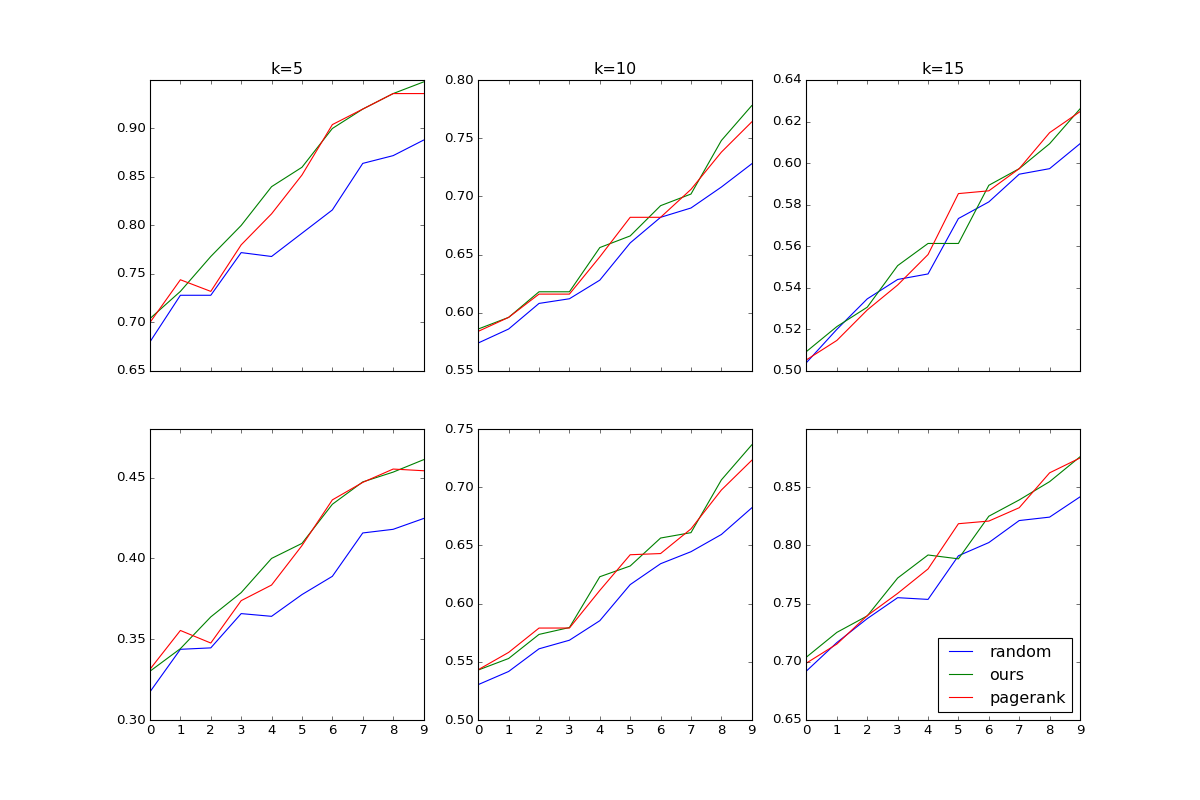

In [80]:
fig, axes = plt.subplots(2, len(ks), figsize=(5*len(ks), 5*2), sharex=True)
for i in range(2):  # column 0 - precision / column 1 - recall
    for j, k in enumerate(ks):  # k
        ax = axes[i, j] 
        for method in methods:
            ax.plot(np.arange(n_queries), mean_scores[k][method][:, i]) 
        if i==0:
            ax.set_title('k={}'.format(k))
plt.legend(methods, loc='lower right')
plt.savefig('figs/query_comparison_{}.pdf'.format(graph_name))